In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
#warnings.filterwarning('ignore')

In [ ]:
data=pd.read_csv('/content/Heart Disease data.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


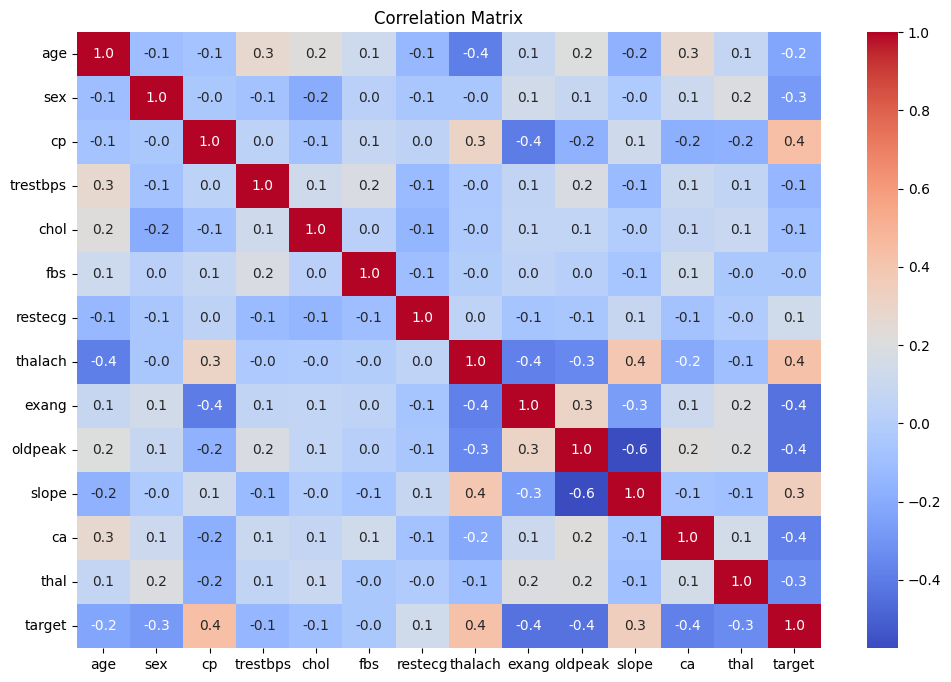

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

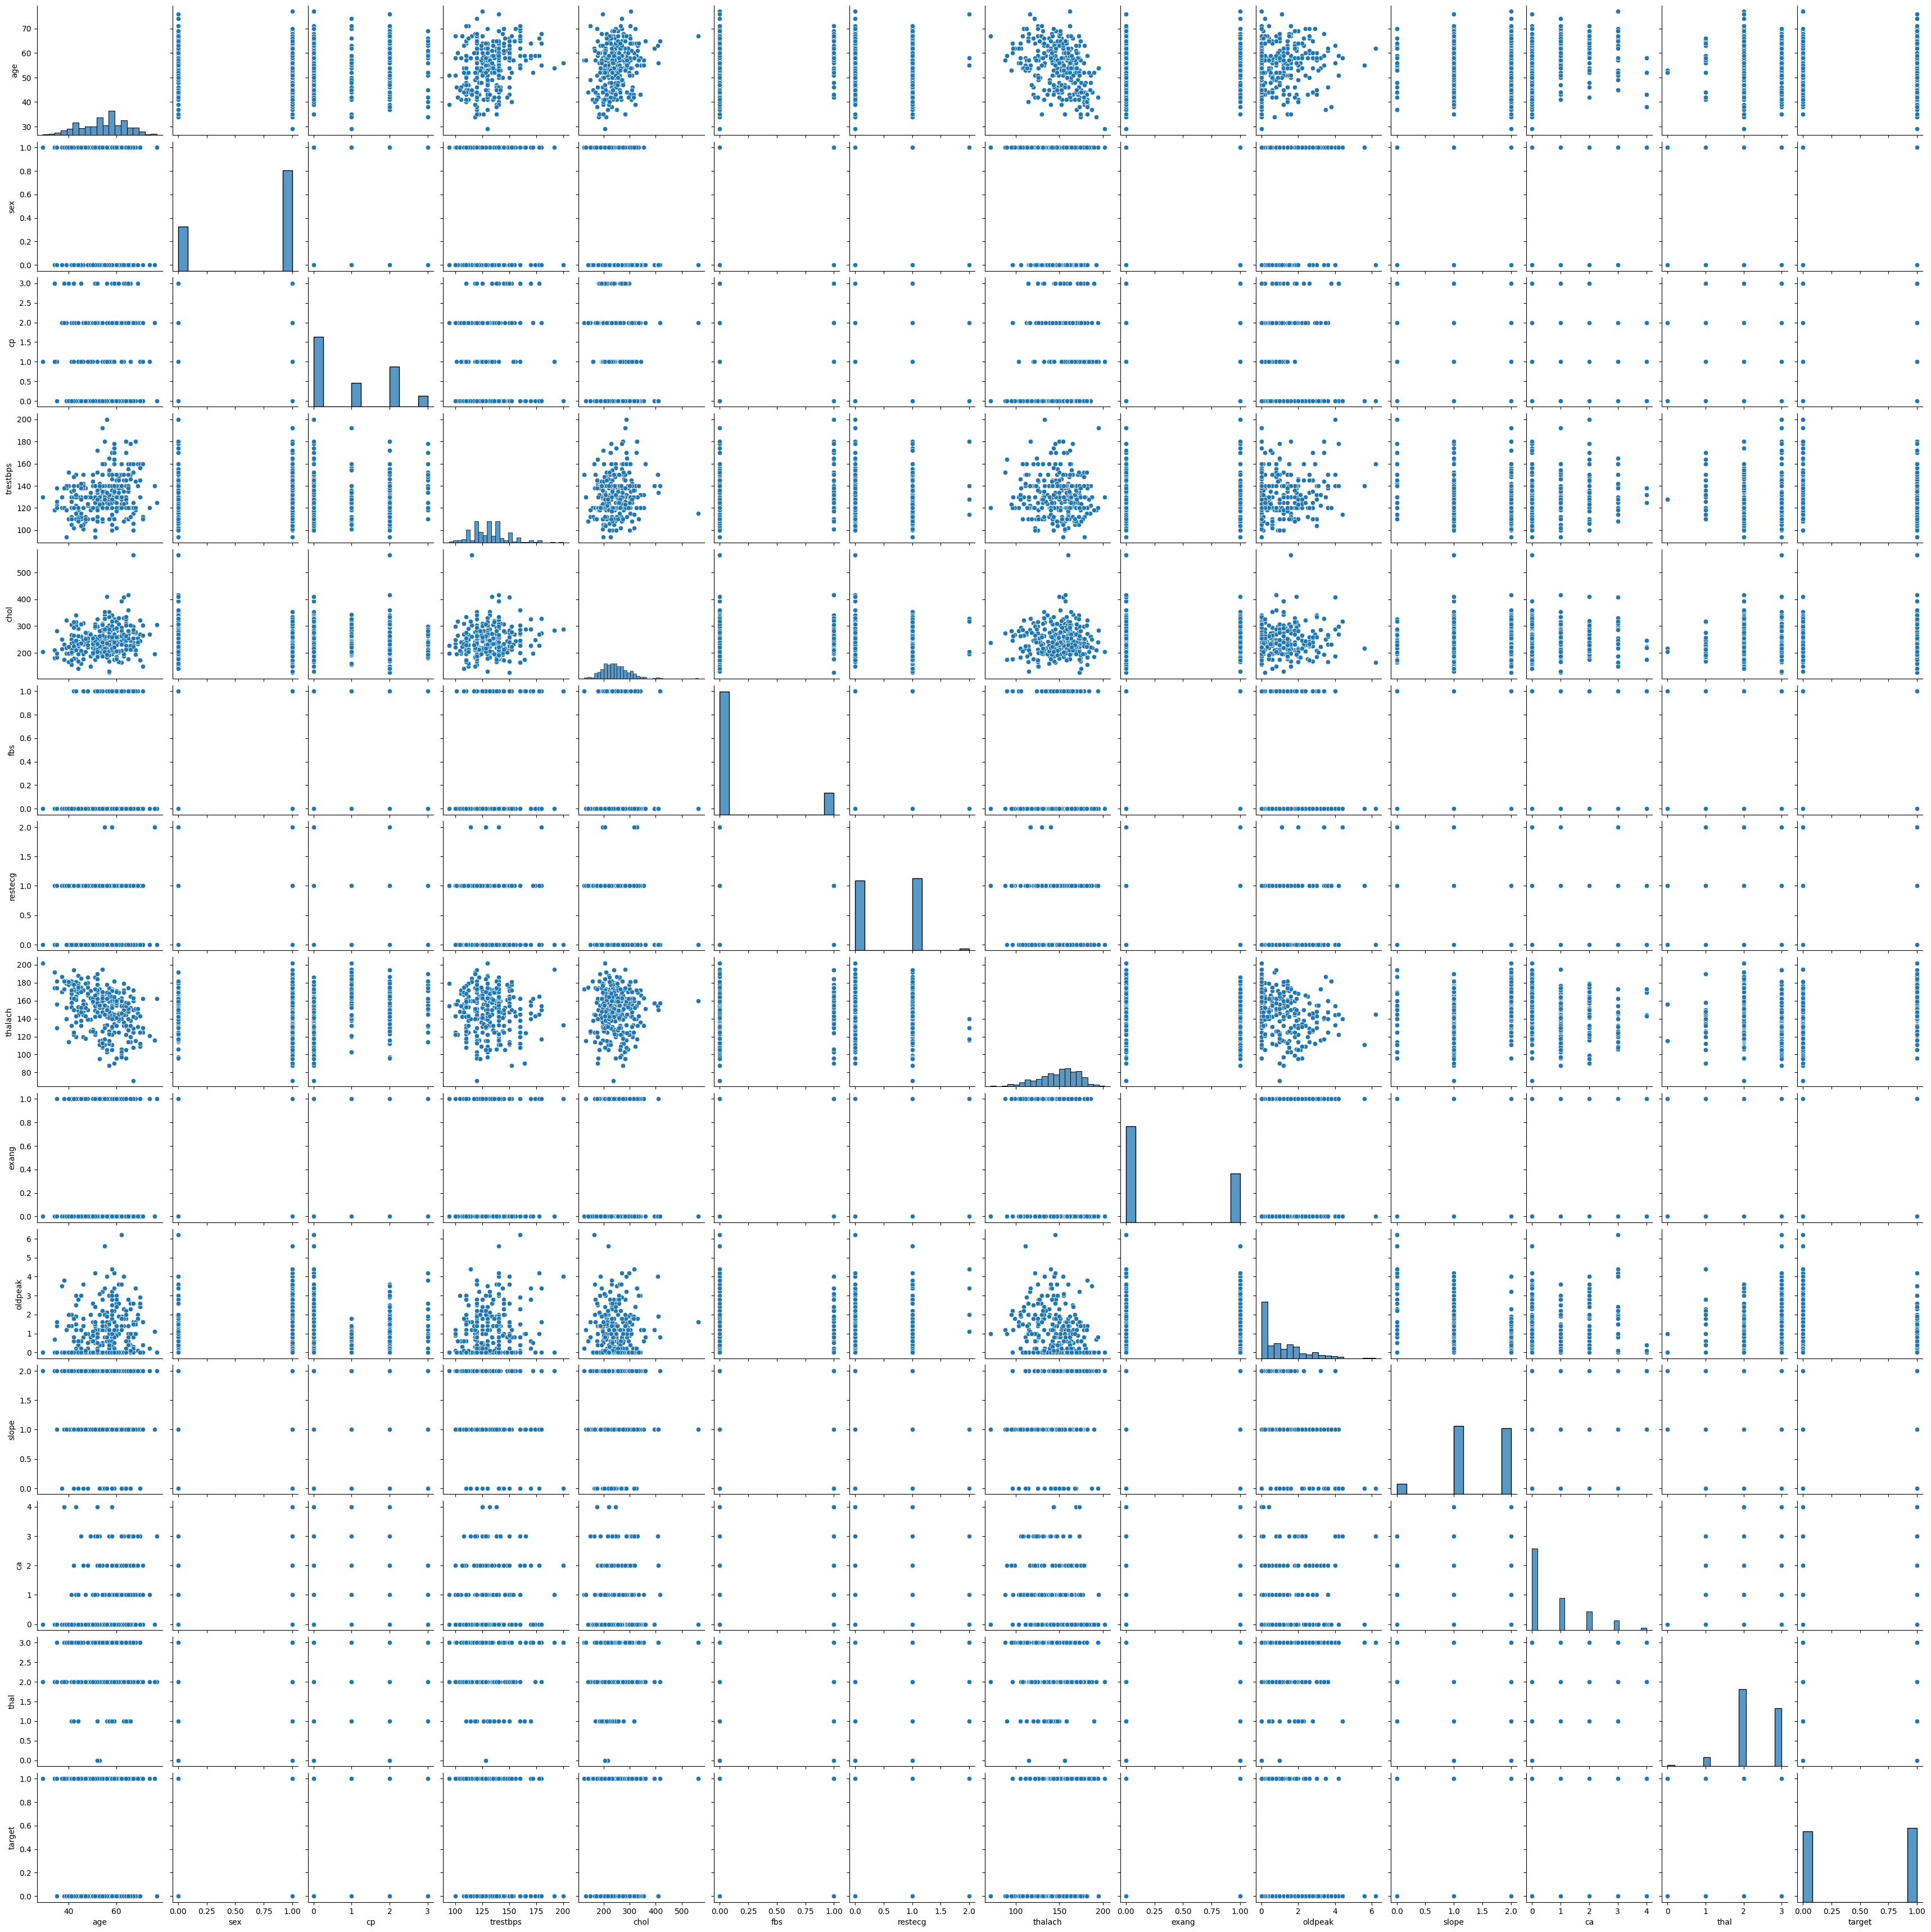

In [ ]:
sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

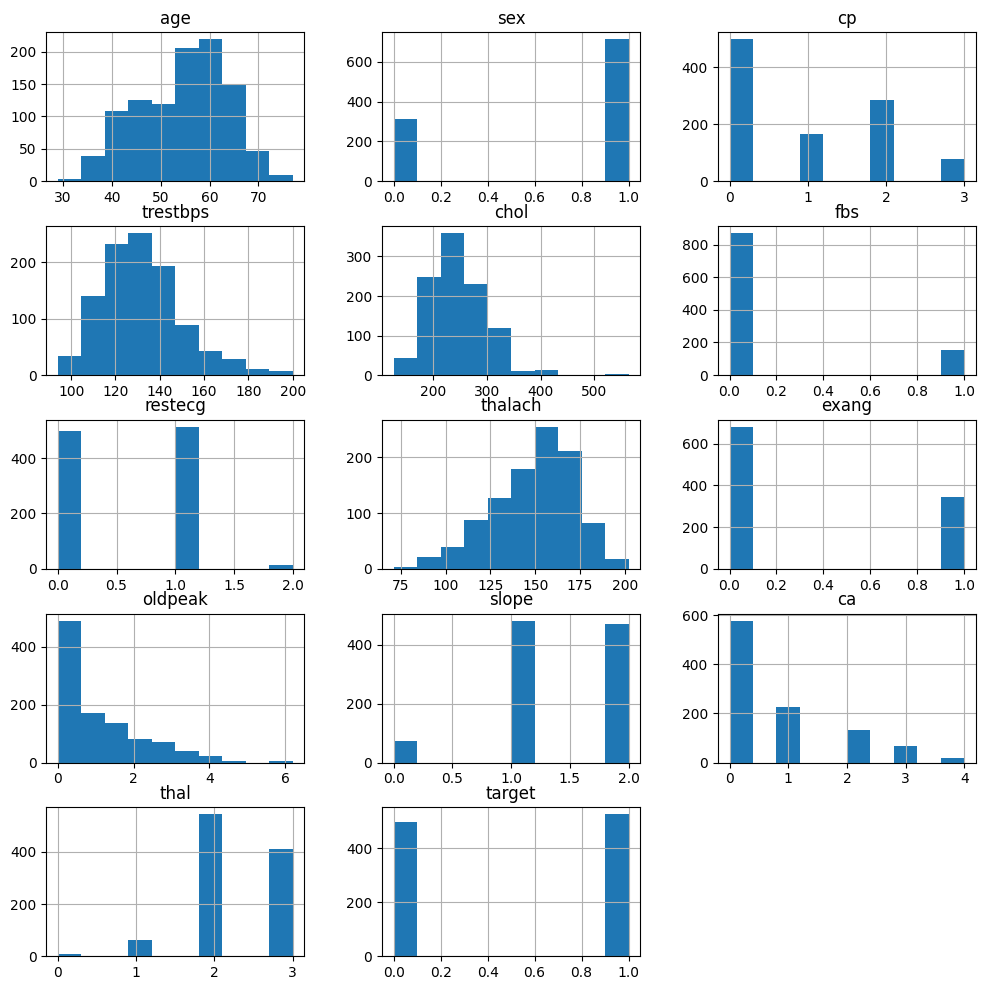

In [ ]:
data.hist(figsize=(12,12),layout=(5,3))

check heart diseases or no heart diseases

In [ ]:
num=data.groupby('target').size()
num

target
0    499
1    526
dtype: int64

In [ ]:
def Heart_Diseases(row):
  if row==0:
    return'Absence'
  elif row==1:
    return 'Presence'

In [ ]:
data['diseases']=data['target'].apply(Heart_Diseases)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,diseases
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [ ]:
hd=data.groupby('diseases')['target'].count()
hd

diseases
Absence     499
Presence    526
Name: target, dtype: int64

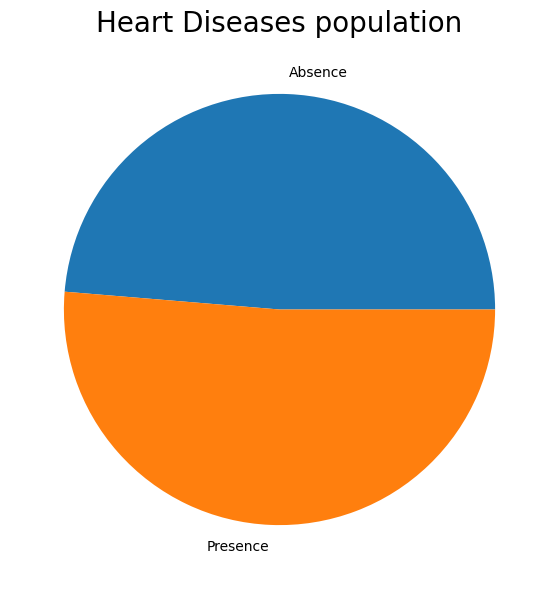

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(hd,labels=['Absence','Presence'])
plt.title('Heart Diseases population',fontsize=20)
plt.show()

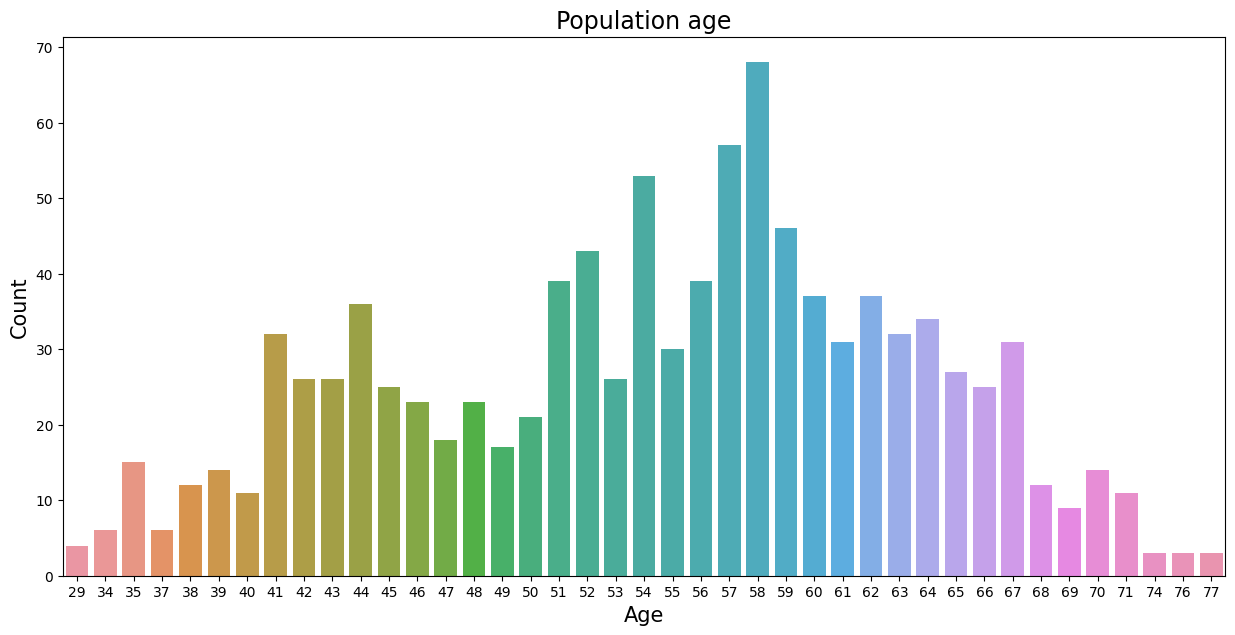

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',data=data)
plt.title('Population age',fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
young_age=data[(data['age']>=29)&(data['age']<=40)]
middle_age=data[(data['age']>40)&(data['age']<55)]
elder_age=data[(data['age']>55)]
print('Young age',len(young_age))
print('Middle age',len(middle_age))
print('Elder age',len(elder_age))


Young age 68
Middle age 408
Elder age 519


In [ ]:
def gender(row):
  if row==1:
    return 'Male'
  elif row==0:
    return 'Female'

In [ ]:
data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,diseases,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [ ]:
def age_range(row):
  if row>=29 and row<40:
    return 'Young age'
  elif row>=40 and row<55:
    return 'Middle age'
  elif row>55:
    return 'Elder age'

In [ ]:
data['Age range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,diseases,sex1,Age range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder age


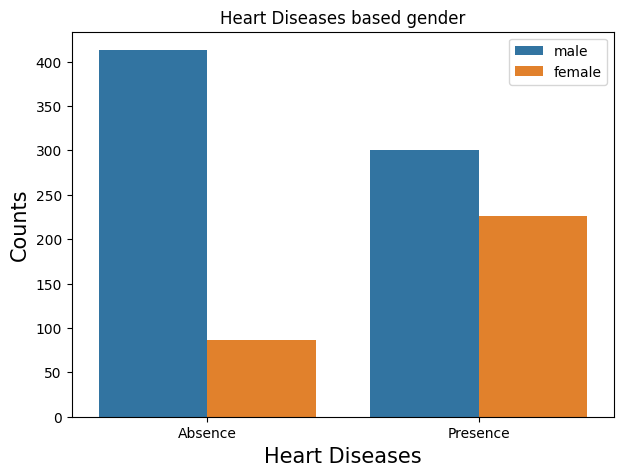

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=data['diseases'],hue='sex1',data=data)
plt.title('Heart Diseases based gender',fontsize=12)
plt.xlabel('Heart Diseases',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['male','female'])
plt.show()

In [ ]:
df['cp'].value_counts()#cheast pain

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

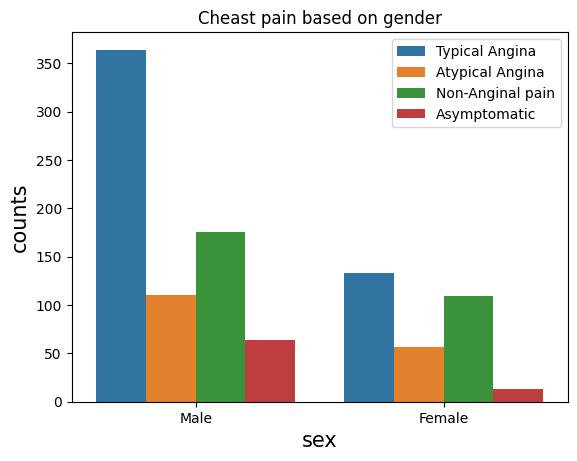

In [ ]:
sns.countplot(x=data['sex1'],hue='cp',data=data)
plt.title('Cheast pain based on gender',fontsize=12)
plt.xlabel('sex',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

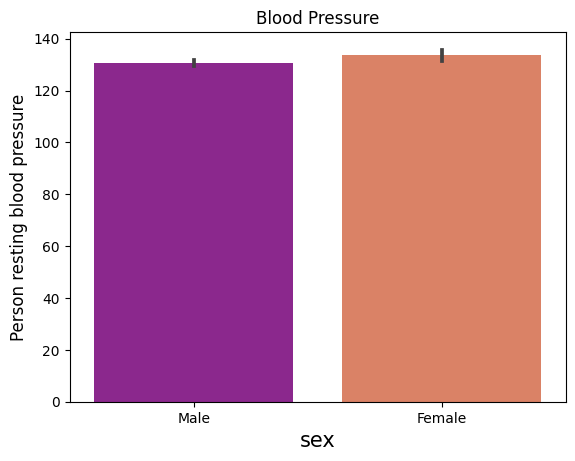

In [ ]:
sns.barplot(x='sex1',y='trestbps',data=data,palette='plasma')
plt.title('Blood Pressure',fontsize=12)
plt.xlabel('sex',fontsize=15)
plt.ylabel('Person resting blood pressure',fontsize=12)
plt.show()

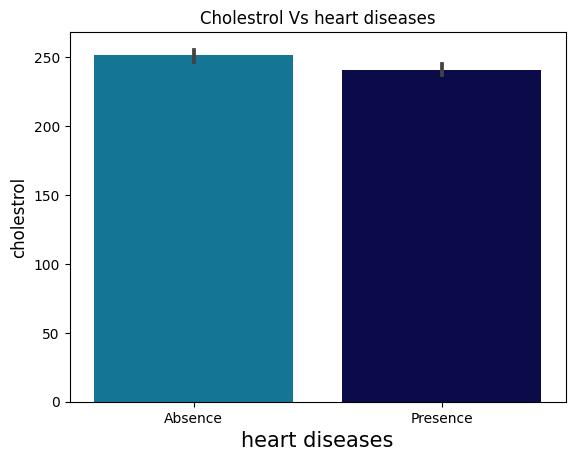

In [ ]:
sns.barplot(x='diseases',y='chol',data=data,palette='ocean_r')
plt.title('Cholestrol Vs heart diseases',fontsize=12)
plt.xlabel('heart diseases',fontsize=15)
plt.ylabel('cholestrol',fontsize=12)
plt.show()

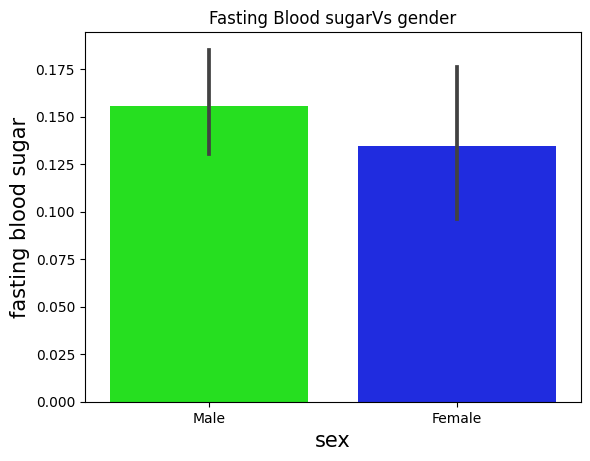

In [ ]:
sns.barplot(y='fbs',x='sex1',data=data,palette='hsv')
plt.title('Fasting Blood sugarVs gender',fontsize=12)
plt.xlabel('sex',fontsize=15)
plt.ylabel('fasting blood sugar',fontsize=15)
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

